In [1]:
#Imports
import pandas as pd
import numpy as np

In [3]:
#Read and print data
troop_movements_df = pd.read_csv('../troop_movements.csv')
print(troop_movements_df.head())

             timestamp  unit_id           unit_type empire_or_resistance  \
0  2024-05-21 08:24:55        1              x-wing           resistance   
1  2024-05-21 08:24:54        2               at-st               empire   
2  2024-05-21 08:24:53        3  resistance_soldier           resistance   
3  2024-05-21 08:24:52        4        tie_silencer           resistance   
4  2024-05-21 08:24:51        5         tie_fighter               empire   

   location_x  location_y  destination_x  destination_y  homeworld  
0           7           4              3              6      Shili  
1           3          10              8              5  Malastare  
2           6           8              9              8   Alderaan  
3           9           8              5             10  Trandosha  
4           8          10              1              4       Ojom  


In [4]:
# Create grouped data showing counts of empire vs resistance.
empire_vs_resistance = troop_movements_df['empire_or_resistance'].value_counts().reset_index()
empire_vs_resistance.columns = ['empire_or_resistance', 'count']
print(empire_vs_resistance)

  empire_or_resistance  count
0               empire    512
1           resistance    488


In [5]:
# Create grouped data showing counts of characters by homeworld
homeworld_counts = troop_movements_df['homeworld'].value_counts().reset_index()
homeworld_counts.columns = ['homeworld', 'count']
print(homeworld_counts)

       homeworld  count
0         Umbara     31
1       Tatooine     31
2        Troiken     30
3       Alderaan     30
4    Aleen Minor     30
5       Dathomir     30
6         Mirial     29
7        Stewjon     29
8      Malastare     28
9           Tund     28
10      Champala     28
11         Zolan     27
12      Kashyyyk     27
13     Chandrila     26
14        Ryloth     26
15        Eriadu     25
16  Concord Dawn     25
17       Socorro     25
18    Bestine IV     24
19      Corellia     24
20       Tholoth     24
21       Quermia     24
22         Shili     24
23         Rodia     23
24      Mon Cala     23
25         Cerea     23
26       Dagobah     23
27         Dorin     22
28      Toydaria     22
29      Iridonia     21
30   Glee Anselm     21
31          Ojom     20
32       Sullust     20
33       Serenno     20
34       Iktotch     19
35    Muunilinst     19
36         Kalee     19
37         Naboo     18
38       Vulpter     16
39         Skako     16
40    Haruun Kal

In [7]:
# Created grouped data showing counts of characters by unit_type.
unit_type_counts = troop_movements_df['unit_type'].value_counts().reset_index()
unit_type_counts.columns = ['unit_type', 'count']
print(unit_type_counts)

            unit_type  count
0  resistance_soldier    142
1        tie_silencer    138
2               at-at    128
3         tie_fighter    120
4             unknown    120
5        stormtrooper    118
6              x-wing    117
7               at-st    117


In [9]:
# Engineer a new feature called is_resistance with a True or False value based on empire_or_resiatance.
troop_movements_df['is_resistance'] = troop_movements_df['empire_or_resistance'] == 'resistance'
print(troop_movements_df.head())

             timestamp  unit_id           unit_type empire_or_resistance  \
0  2024-05-21 08:24:55        1              x-wing           resistance   
1  2024-05-21 08:24:54        2               at-st               empire   
2  2024-05-21 08:24:53        3  resistance_soldier           resistance   
3  2024-05-21 08:24:52        4        tie_silencer           resistance   
4  2024-05-21 08:24:51        5         tie_fighter               empire   

   location_x  location_y  destination_x  destination_y  homeworld  \
0           7           4              3              6      Shili   
1           3          10              8              5  Malastare   
2           6           8              9              8   Alderaan   
3           9           8              5             10  Trandosha   
4           8          10              1              4       Ojom   

   is_resistance  
0           True  
1          False  
2           True  
3           True  
4          False  


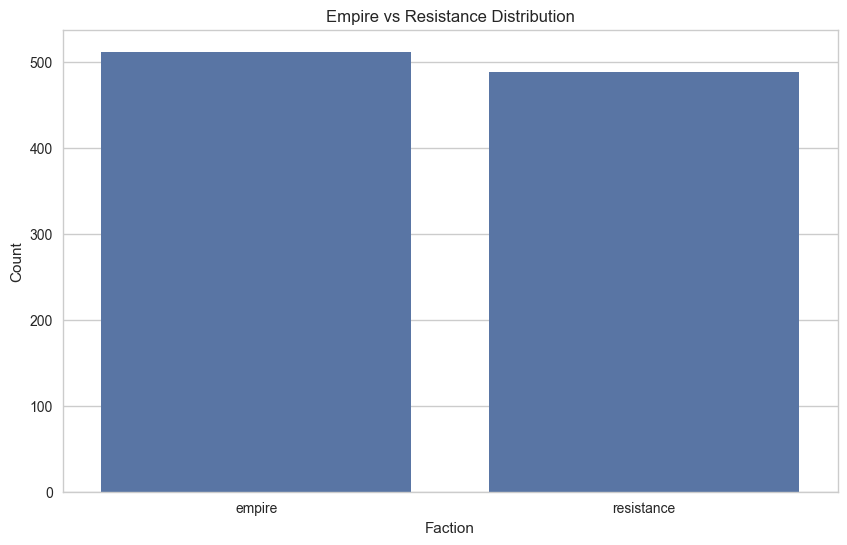

In [17]:
# Create a bar plot using Seaborn showing Empire vs Resistance distribution.
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='empire_or_resistance', y='count', data=empire_vs_resistance)
plt.title('Empire vs Resistance Distribution')
plt.xlabel('Faction')
plt.ylabel('Count')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = troop_movements_df[['unit_type', 'homeworld']]
X_encoded = pd.get_dummies(X, columns=['unit_type', 'homeworld'])
y = troop_movements_df['empire_or_resistance']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier and fit the data
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

# Calculate accurace score
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy: " + str(accuracy))

Model Accuracy: 0.455


In [23]:
# Get feature importances
importances = troop_movements_df.feature_importances_

# Create a DataFrame to hold the feature importances
feature_importances = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': importances})


AttributeError: 'DataFrame' object has no attribute 'feature_importances_'